In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
#Initializing the CNN
classifier = Sequential()

In [ ]:
classifier.add(Convolution2D(32, (3, 3), input_shape = (64,64,3), activation = 'relu'))

In [ ]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [ ]:
classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [ ]:
classifier.add(Flatten())

In [ ]:
classifier.add(Dense(units = 128, activation = 'relu'))

In [ ]:
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [13]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
training_set = train_datagen.flow_from_directory('dataset/train_set',
                                                  target_size=(64, 64),
                                                  batch_size=32,
                                                  class_mode='binary')

Found 27558 images belonging to 2 classes.


In [22]:
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 5512 images belonging to 2 classes.


In [23]:
classifier.fit_generator(
        training_set,
        steps_per_epoch=27558//32,
        epochs = 25,
        validation_data=test_set,
        validation_steps = 5512//32)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
861/861 [==============================] - 174s 202ms/step - loss: 0.4067 - accuracy: 0.8091 - val_loss: 0.2858 - val_accuracy: 0.8881
Epoch 2/25
861/861 [==============================] - 171s 199ms/step - loss: 0.2185 - accuracy: 0.9201 - val_loss: 0.2178 - val_accuracy: 0.9175
Epoch 3/25
861/861 [==============================] - 174s 202ms/step - loss: 0.1760 - accuracy: 0.9410 - val_loss: 0.2149 - val_accuracy: 0.9370
Epoch 4/25
861/861 [==============================] - 171s 199ms/step - loss: 0.1603 - accuracy: 0.9487 - val_loss: 0.1635 - val_accuracy: 0.9449
Epoch 5/25
861/861 [==============================] - 170s 198ms/step - loss: 0.1499 - accuracy: 0.9505 - val_loss: 0.1640 - val_accuracy: 0.9455
Epoch 6/25
861/861 [==============================] - 171s 199ms/step - loss: 0.1436 - accuracy: 0.9526 - val_loss: 0.1655 - val_accuracy: 0.9471
Epoch 7/25
861/861 [============================

In [24]:
classifier.save('testmodel1.h5')

In [30]:
import numpy as np
from keras.preprocessing import image

In [31]:
test_img = image.load_img('test_set/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png', target_size = (64,64))

In [32]:
test_img = image.img_to_array(test_img)

In [33]:
test_img = np.expand_dims(test_img, axis=0)

In [34]:
result = classifier.predict(test_img)

In [35]:
training_set.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [36]:
print(result)

[[0.]]


In [37]:
if result[0][0] == 0:
  prediction = 'Parasitized'
else:
  prediction = 'Uninfected'


In [38]:
prediction

'Parasitized'

In [28]:
import matplotlib.pyplot as plt
import numpy as np

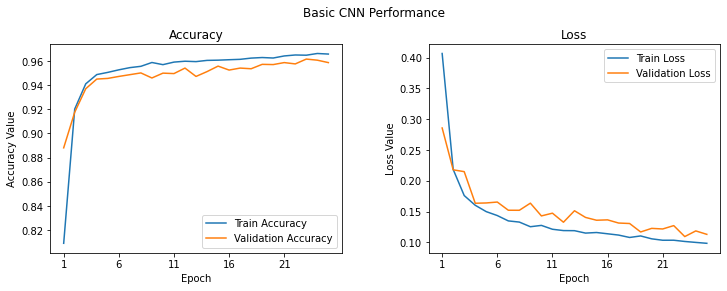

In [29]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(classifier.history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, classifier.history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, classifier.history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, classifier.history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, classifier.history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")